In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
#Importing dataset
df = pd.read_csv("Investing_INR_Rates.csv")

In [3]:
df.shape

(1847, 8)

In [4]:
df.head()

,Unnamed: 0,Date,Price,Open,High,Low,Volume,Chg
0,0,"Mar 31, 2023",82.160,82.088,82.282,82.044,0,0.10%
1,1,"Mar 30, 2023",82.080,82.238,82.286,82.030,0,-0.12%
2,2,"Mar 29, 2023",82.178,82.164,82.390,82.164,0,0.01%
3,3,"Mar 28, 2023",82.172,82.195,82.290,82.113,0,-0.01%
4,4,"Mar 27, 2023",82.180,82.374,82.441,82.200,0,-0.19%


In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg'], dtype='object')

In [6]:
# Let's remove the unwanted first column
df = df.drop(columns=df.columns[0])

In [7]:
df.dtypes

Date       object
Price     float64
Open      float64
High      float64
Low       float64
Volume     object
Chg        object
dtype: object

In [8]:
# converting date to datetime64[ns] type
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')

In [9]:
import datetime
df['Date'] = df['Date'].dt.strftime('%d/%m/%Y')

In [10]:
df.head()

,Date,Price,Open,High,Low,Volume,Chg
0,31/03/2023,82.160,82.088,82.282,82.044,0,0.10%
1,30/03/2023,82.080,82.238,82.286,82.030,0,-0.12%
2,29/03/2023,82.178,82.164,82.390,82.164,0,0.01%
3,28/03/2023,82.172,82.195,82.290,82.113,0,-0.01%
4,27/03/2023,82.180,82.374,82.441,82.200,0,-0.19%


In [11]:
#Find the duplicates
df.duplicated().sum()

0

In [12]:
# We can get date month and year part from the date column
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Day_of_week'] = df['Date'].dt.weekday

In [13]:
df.head()

,Date,Price,Open,High,Low,Volume,Chg,Month,Year,Day,Day_of_week
0,2023-03-31,82.160,82.088,82.282,82.044,0,0.10%,3,2023,31,4
1,2023-03-30,82.080,82.238,82.286,82.030,0,-0.12%,3,2023,30,3
2,2023-03-29,82.178,82.164,82.390,82.164,0,0.01%,3,2023,29,2
3,2023-03-28,82.172,82.195,82.290,82.113,0,-0.01%,3,2023,28,1
4,2023-03-27,82.180,82.374,82.441,82.200,0,-0.19%,3,2023,27,0


In [14]:
df.shape

(1847, 11)

In [15]:
# Removing % from Change column
df['Chg'] = df['Chg'].str.rstrip('%').astype('double')

In [16]:
# Changing K to 1000 in Volume column
df['Volume'] = df['Volume'].str.rstrip('K').astype('double')*1000

In [17]:
df.head()

,Date,Price,Open,High,Low,Volume,Chg,Month,Year,Day,Day_of_week
0,2023-03-31,82.160,82.088,82.282,82.044,0.0,0.10,3,2023,31,4
1,2023-03-30,82.080,82.238,82.286,82.030,0.0,-0.12,3,2023,30,3
2,2023-03-29,82.178,82.164,82.390,82.164,0.0,0.01,3,2023,29,2
3,2023-03-28,82.172,82.195,82.290,82.113,0.0,-0.01,3,2023,28,1
4,2023-03-27,82.180,82.374,82.441,82.200,0.0,-0.19,3,2023,27,0


# Chaos Test - Will be adding later

# ADF Test

In [18]:
# check for Stationarity - ADF Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Price'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.925688866480476
p-value: 0.32007441552802157
Critial Values:
   1%, -3.4339089382000556
Critial Values:
   5%, -2.863112072235607
Critial Values:
   10%, -2.5676069166469753


In [19]:
"""
From ADF test, it's observed that, data is not stationary. 
We can see p-value is 32% (usually it must be less than 0.05 or 5%), 
and ADF-stat value is greater than all the critical values. 

Both these values confirms the data to be Non-Stationary
"""

"\nFrom ADF test, it's observed that, data is not stationary. \nWe can see p-value is 32% (usually it must be less than 0.05 or 5%), \nand ADF-stat value is greater than all the critical values. \n\nBoth these values confirms the data to be Non-Stationary\n"

# Splitting the dataset

In [20]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

In [21]:
X.shape

(1847, 9)

In [22]:
y.shape

(1847,)

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1, 1))

In [25]:
y_train.shape

(1292, 1)

In [26]:
# SMAPE function - Symmetric mean absolute percentage error
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [27]:
# Direction Symmetry - It gives the percentage of occurrences in which the sign of the change in value from one time period to the next is the same for both the actual and predicted time series
def ds(A, F):
    sum_A = 0
    for i in range(1, len(A)):
        sum_A += 1 if (A[i]-A[i-1])*(F[i]-F[i-1])>0 else 0
    return (100*sum_A)/(len(A)-1)

In [28]:
# Theil's U coefficient - The greater accuracy of the forecast, the lower will be the value of the u1
def u1(A,F):
    data = pd.DataFrame({'A_i':A, 'F_i': F})
    data['(A_i - F_i)^2'] = np.square(data['A_i'] - data['F_i'])
    data['F_i^2'] = np.square(data['F_i'])
    data['A_i^2'] = np.square(data['A_i'])
    return (np.sqrt(np.mean(data['(A_i - F_i)^2'])))/(np.sqrt(np.mean(data['F_i^2']))+np.sqrt(np.mean(data['A_i^2'])))

# Linear Regression

In [29]:
# Fitting Linear Regression in dataset
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

In [30]:
import math
from sklearn.metrics import r2_score, mean_squared_error

print("R2 score: ", r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", math.sqrt(mean_squared_error(y_test, y_pred)))

R2 score:  0.9998434742235243
MSE 0.004199852034146459
RMSE 0.06480626539267989


In [31]:
y_pred = np.squeeze(y_pred)

 SMAPE prediction

In [32]:
print(smape(y_test, y_pred))

0.06721037132570207


 Direction Symmetry prediction

In [33]:
print(ds(y_test, y_pred))

100.0


 Theil's U coefficient prediction

In [34]:
print(u1(y_test, y_pred))

0.00045089917483360955


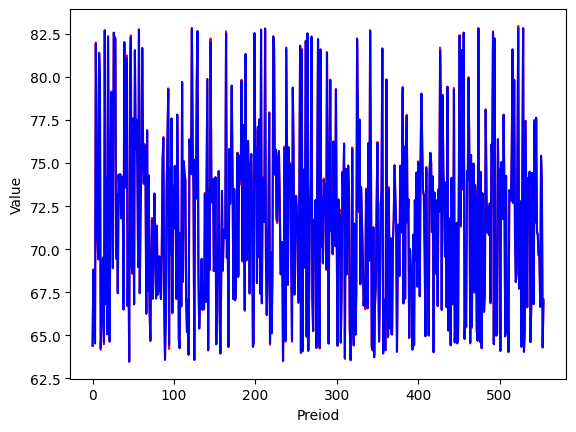

In [35]:
plt.rc("figure")
plt.plot(y_test, color="r")
plt.plot(y_pred, color="b")
plt.xlabel("Preiod")
plt.ylabel("Value")
plt.show()

# Forecasting Results

In [36]:
val_data = pd.read_csv("Validation_Dataset.csv")

In [37]:
val_data.sort_values(by='Date', inplace = True) 
val_data

,Date,Price,Open,High,Low,Volume,Chg
9,"Apr 03, 2023",82.190,82.391,82.484,82.190,0,0.04%
8,"Apr 04, 2023",82.090,82.219,82.279,82.077,0,-0.12%
7,"Apr 05, 2023",81.920,82.123,82.217,81.843,0,-0.21%
6,"Apr 06, 2023",81.820,81.953,82.059,81.810,0,-0.12%
5,"Apr 07, 2023",81.860,81.832,81.910,81.790,0,0.05%
4,"Apr 10, 2023",81.965,81.844,82.045,81.761,0,0.13%
3,"Apr 11, 2023",82.040,81.966,82.160,81.927,0,0.09%
2,"Apr 12, 2023",81.930,82.088,82.126,81.930,0,-0.13%
1,"Apr 13, 2023",81.650,82.008,82.027,81.628,0,-0.34%
0,"Apr 14, 2023",81.820,81.701,81.930,81.547,0,0.21%


In [38]:
actual_values = list(val_data['Price'])
val_data = val_data.drop(['Price'], axis=1)

In [39]:
date_list = list(val_data['Date'])

In [40]:
# converting date to datetime64[ns] type
val_data['Date'] = pd.to_datetime(val_data['Date'], format='%b %d, %Y')
val_data

,Date,Open,High,Low,Volume,Chg
9,2023-04-03,82.391,82.484,82.190,0,0.04%
8,2023-04-04,82.219,82.279,82.077,0,-0.12%
7,2023-04-05,82.123,82.217,81.843,0,-0.21%
6,2023-04-06,81.953,82.059,81.810,0,-0.12%
5,2023-04-07,81.832,81.910,81.790,0,0.05%
4,2023-04-10,81.844,82.045,81.761,0,0.13%
3,2023-04-11,81.966,82.160,81.927,0,0.09%
2,2023-04-12,82.088,82.126,81.930,0,-0.13%
1,2023-04-13,82.008,82.027,81.628,0,-0.34%
0,2023-04-14,81.701,81.930,81.547,0,0.21%


In [41]:
import datetime
val_data['Date'] = val_data['Date'].dt.strftime('%d/%m/%Y')
val_data

,Date,Open,High,Low,Volume,Chg
9,03/04/2023,82.391,82.484,82.190,0,0.04%
8,04/04/2023,82.219,82.279,82.077,0,-0.12%
7,05/04/2023,82.123,82.217,81.843,0,-0.21%
6,06/04/2023,81.953,82.059,81.810,0,-0.12%
5,07/04/2023,81.832,81.910,81.790,0,0.05%
4,10/04/2023,81.844,82.045,81.761,0,0.13%
3,11/04/2023,81.966,82.160,81.927,0,0.09%
2,12/04/2023,82.088,82.126,81.930,0,-0.13%
1,13/04/2023,82.008,82.027,81.628,0,-0.34%
0,14/04/2023,81.701,81.930,81.547,0,0.21%


In [42]:
# We can get date month and year part from the date column
val_data['Date'] = pd.to_datetime(val_data['Date'])
val_data['Month'] = val_data['Date'].dt.month
val_data['Year'] = val_data['Date'].dt.year
val_data['Day'] = val_data['Date'].dt.day
val_data['Day_of_week'] = val_data['Date'].dt.weekday

In [43]:
# Removing % from Change column
val_data['Chg'] = val_data['Chg'].str.rstrip('%').astype('double')

In [44]:
# Changing K to 1000 in Volume column
val_data['Volume'] = val_data['Volume'].astype(str).str.rstrip('K').astype('double')*1000

In [45]:
test_X = val_data.iloc[:, 1:].values
test_X = sc_X.transform(test_X)

In [46]:
predict_values = lr.predict(test_X)

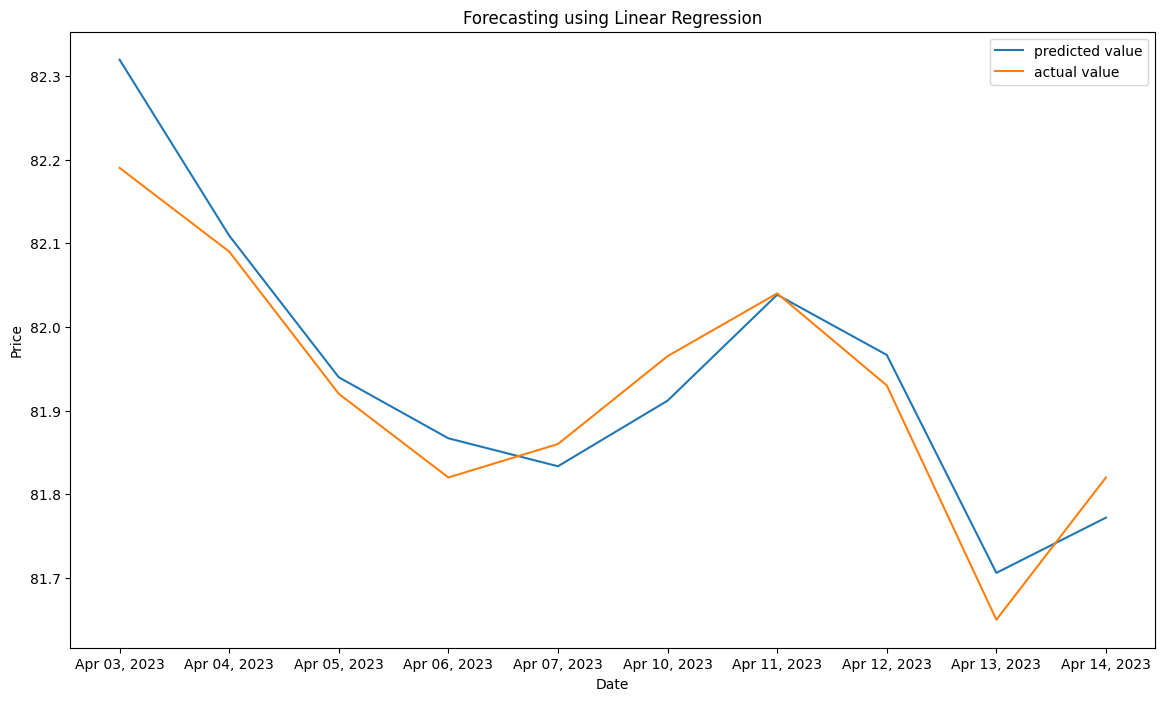

In [47]:
plt.figure(figsize=(14, 8))
plt.plot(date_list, list(sc_y.inverse_transform(predict_values)), label ='predicted value')
plt.plot(date_list, actual_values, label ='actual value')

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title('Forecasting using Linear Regression')
plt.show()

# Polynomial Regression

In [48]:
# Fitting Polynomial Regression in dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans, y_train)
y_pred = lr.predict(X_test_trans)
y_pred = sc_y.inverse_transform(y_pred)

In [49]:
import math
from sklearn.metrics import r2_score, mean_squared_error

print("R2 score: ", r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", math.sqrt(mean_squared_error(y_test, y_pred)))

R2 score:  0.9998438350438854
MSE 0.004190170611941816
RMSE 0.06473152718684934


In [50]:
y_pred = np.squeeze(y_pred)

 SMAPE prediction

In [51]:
print(smape(y_test, y_pred))

0.06652452024749476


 Direction Symmetry prediction

In [52]:
print(ds(y_test, y_pred))

99.63898916967509


 Theil's U coefficient prediction

In [53]:
print(u1(y_test, y_pred))

0.000450379027942801


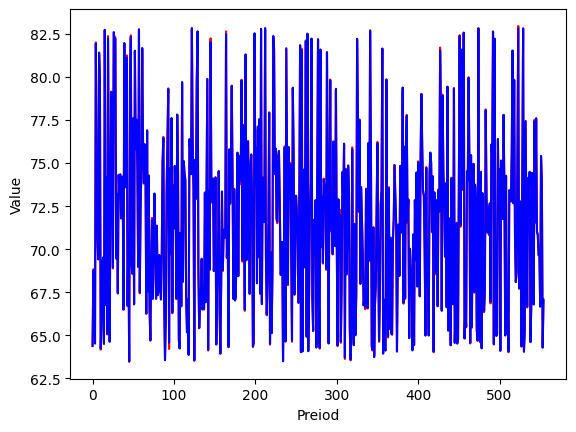

In [54]:
plt.rc("figure")
plt.plot(y_test, color="r")
plt.plot(y_pred, color="b")
plt.xlabel("Preiod")
plt.ylabel("Value")
plt.show()

# Decision Tree Regression

In [55]:
# Fitting Decision Tree Regression in dataset
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor(random_state = 42) 

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

In [56]:
import math
from sklearn.metrics import r2_score, mean_squared_error

print("R2 score: ", r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", math.sqrt(mean_squared_error(y_test, y_pred)))

R2 score:  0.9992936251846206
MSE 0.01895323423423425
RMSE 0.1376707457459073


In [57]:
y_pred = np.squeeze(y_pred)

 SMAPE prediction

In [58]:
print(smape(y_test, y_pred))

0.141440013607546


 Direction Symmetry prediction

In [59]:
print(ds(y_test, y_pred))

99.27797833935018


 Theil's U coefficient prediction

In [60]:
print(u1(y_test, y_pred))

0.0009578255063253096


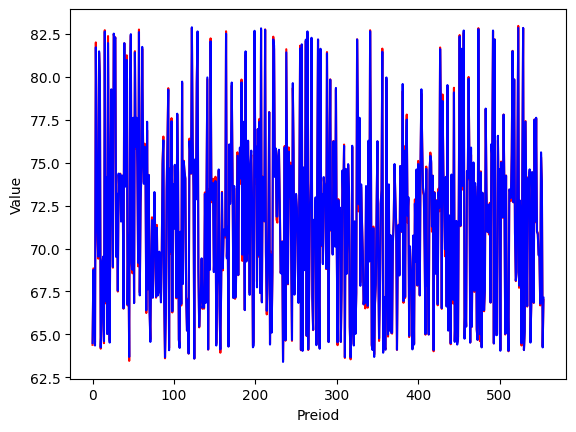

In [61]:
plt.rc("figure")
plt.plot(y_test, color="r")
plt.plot(y_pred, color="b")
plt.xlabel("Preiod")
plt.ylabel("Value")
plt.show()

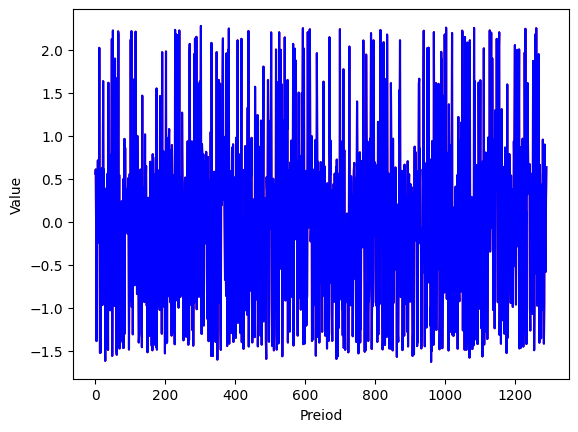

In [62]:
# It is overfitted
plt.rc("figure")
plt.plot(y_train, color="r")
plt.plot(regressor.predict(X_train), color="b")
plt.xlabel("Preiod")
plt.ylabel("Value")
plt.show()

# Random Forest Regression

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
model = RandomForestRegressor()

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": [3, 4],
              "n_estimators": [100, 300, 1000]}

# try out every combination of the above values
search = GridSearchCV(model, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'max_depth': 4, 'n_estimators': 100}


In [66]:
# Fitting Random Forest Regression in dataset
regressor = RandomForestRegressor(n_estimators  = search.best_params_["n_estimators"],
                                   max_depth     = search.best_params_["max_depth"])

regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

In [67]:
import math
from sklearn.metrics import r2_score, mean_squared_error

print("R2 score: ", r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", math.sqrt(mean_squared_error(y_test, y_pred)))

R2 score:  0.9978735962692376
MSE 0.05705501825407693
RMSE 0.23886192298915482


In [68]:
y_pred = np.squeeze(y_pred)

 SMAPE prediction

In [69]:
print(smape(y_test, y_pred))

0.24735213806783105


 Direction Symmetry prediction

In [70]:
print(ds(y_test, y_pred))

98.37545126353791


 Theil's U coefficient prediction

In [71]:
print(u1(y_test, y_pred))

0.0016620289877749602


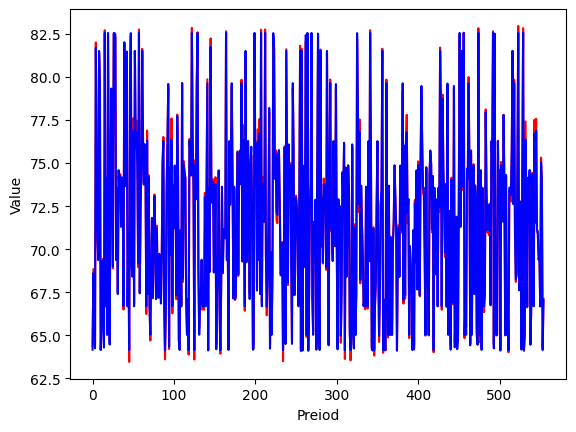

In [72]:
plt.rc("figure")
plt.plot(y_test, color="r")
plt.plot(y_pred, color="b")
plt.xlabel("Preiod")
plt.ylabel("Value")
plt.show()

# XGB Regression

In [73]:
from xgboost import XGBRegressor

In [74]:
model = XGBRegressor()

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
              "n_estimators": [100, 300, 1000],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(model, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 1000}


In [76]:
regressor = XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

In [77]:
import math
from sklearn.metrics import r2_score, mean_squared_error

print("R2 score: ", r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", math.sqrt(mean_squared_error(y_test, y_pred)))

R2 score:  0.9996731997501238
MSE 0.008768604923130226
RMSE 0.09364082935947453


In [78]:
y_pred = np.squeeze(y_pred)

 SMAPE prediction

In [79]:
print(smape(y_test, y_pred))

0.09765413238486738


 Direction Symmetry prediction

In [80]:
print(ds(y_test, y_pred))

99.63898916967509


 Theil's U coefficient prediction

In [81]:
print(u1(y_test, y_pred))

0.0006514880351170458


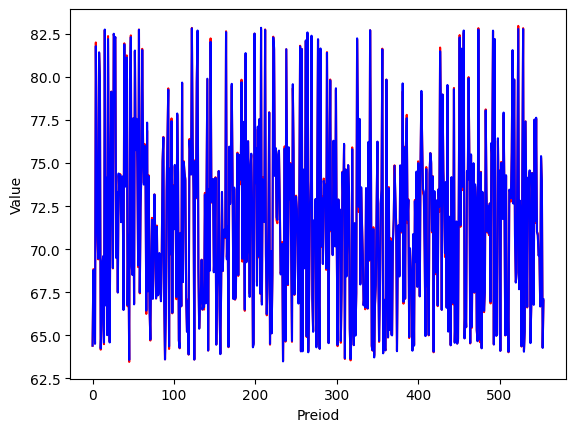

In [82]:
plt.rc("figure")
plt.plot(y_test, color="r")
plt.plot(y_pred, color="b")
plt.xlabel("Preiod")
plt.ylabel("Value")
plt.show()

# SGD Regression

In [83]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [84]:
from sklearn.pipeline import Pipeline

# Create a Pipeline object
sgd_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('sgd', SGDRegressor()),
    ])

# Create a dictionary object with hyperparameters as keys and lists of corresponding values
param_grid = {'sgd__alpha': [0.5, 0.3, 0.2, 0.1, 0.01, 0.001, 0.0001], 
              'sgd__l1_ratio': np.arange(0, 1.1, 0.1), 
              'sgd__max_iter':[100, 200, 500, 1000],
              'sgd__eta0': [0.01, 0.001, 0.0001],
              'sgd__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
              'sgd__warm_start': [True, False]
            }

# Create a GridSearchCV object and perform hyperparameter tuning
sgdr = GridSearchCV(sgd_pipeline, param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# The model is trained with optimal hyperparameters, thus its the optimal model
sgdr.fit(X_train, y_train)

# Get the optimal hyperparameters
params_optimal_sgdr = sgdr.best_params_

print("Best Score (negative mean squared error): %f" % sgdr.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_sgdr)

Fitting 3 folds for each of 7392 candidates, totalling 22176 fits
Best Score (negative mean squared error): -0.000209
Optimal Hyperparameter Values:  {'sgd__alpha': 0.0001, 'sgd__eta0': 0.01, 'sgd__l1_ratio': 0.7000000000000001, 'sgd__learning_rate': 'adaptive', 'sgd__max_iter': 1000, 'sgd__warm_start': False}


In [85]:
y_pred = sgdr.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

In [86]:
import math
from sklearn.metrics import r2_score, mean_squared_error

print("R2 score: ", r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", math.sqrt(mean_squared_error(y_test, y_pred)))

R2 score:  0.9998433283636585
MSE 0.0042037657017074135
RMSE 0.0648364534942143


In [87]:
y_pred = np.squeeze(y_pred)

 SMAPE prediction

In [88]:
print(smape(y_test, y_pred))

0.06630306960524118


 Direction Symmetry prediction

In [89]:
print(ds(y_test, y_pred))

99.63898916967509


 Theil's U coefficient prediction

In [90]:
print(u1(y_test, y_pred))

0.000451107816327078


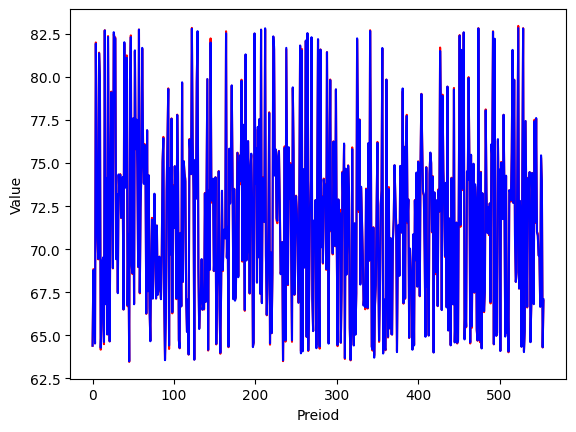

In [91]:
plt.rc("figure")
plt.plot(y_test, color="r")
plt.plot(y_pred, color="b")
plt.xlabel("Preiod")
plt.ylabel("Value")
plt.show()

# LSTM

In [92]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [93]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1, 1))

In [94]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [95]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 9)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            44000     
                                                                 
 dense (Dense)               (None, 1, 1)              101       
                                                                 
Total params: 44,101
Trainable params: 44,101
Non-trainable params: 0
_________________________________________________________________


In [96]:
# fit model
X_train = np.reshape(X_train, (X_train.shape[0], 1, 9))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 9))
history = model.fit(X_train, y_train, epochs=5, batch_size=8, verbose=1, validation_split=0.1)

Epoch 1/5
146/146 [==============================] - 5s 10ms/step - loss: 0.2605 - val_loss: 0.0141
Epoch 2/5
146/146 [==============================] - 1s 5ms/step - loss: 0.0073 - val_loss: 0.0051
Epoch 3/5
146/146 [==============================] - 1s 5ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 4/5
146/146 [==============================] - 1s 5ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 5/5
146/146 [==============================] - 1s 5ms/step - loss: 0.0014 - val_loss: 0.0014


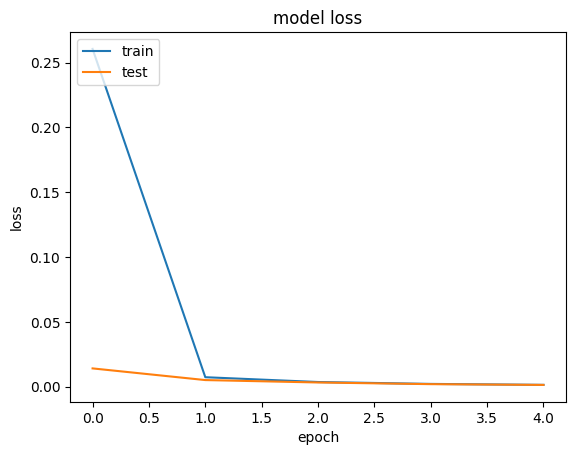

In [97]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [98]:
train_predict = model.predict(X_train)
train_predict = np.squeeze(train_predict)
test_predict = model.predict(X_test)
test_predict = np.squeeze(test_predict)
test_predict = sc_y.inverse_transform(test_predict.reshape(-1, 1))

print('Shape of train and test predict: ', train_predict.shape, test_predict.shape)

18/18 [==============================] - 0s 3ms/step
Shape of train and test predict:  (1292,) (555, 1)


In [99]:
# root mean squared error or rmse
import math
from sklearn.metrics import mean_squared_error

def measure_rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

train_score = measure_rmse(y_train, train_predict.reshape(-1,1))
test_score = measure_rmse(y_test, test_predict)

print('Train and Test RMSE: ', train_score, test_score)

Train and Test RMSE:  0.03336410558914776 0.1638638262742569


In [100]:
import math
from sklearn.metrics import r2_score, mean_squared_error

print("R2 score: ", r2_score(y_test, test_predict))
print("MSE", mean_squared_error(y_test, test_predict))
print("RMSE", math.sqrt(mean_squared_error(y_test, test_predict)))

R2 score:  0.9989992673714628
MSE 0.026851353561239855
RMSE 0.1638638262742569


In [101]:
test_predict = np.squeeze(test_predict)

 SMAPE prediction

In [102]:
print(smape(y_test, test_predict))

0.1694641763656193


 Direction Symmetry prediction

In [103]:
print(ds(y_test, test_predict))

99.27797833935018


 Theil's U coefficient prediction

In [104]:
print(u1(y_test, test_predict))

0.0011400425998786832


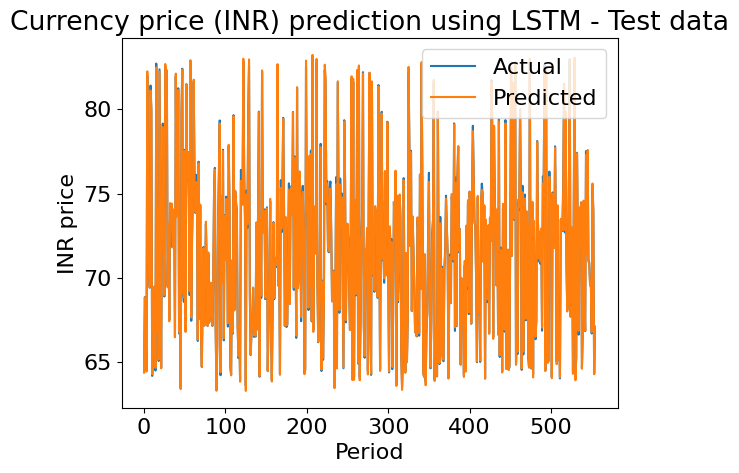

In [105]:
plt.rc("figure")
plt.rcParams.update({'font.size': 16})
plt.plot(y_test, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.xlabel('Period')
plt.ylabel('INR price')
plt.title('Currency price (INR) prediction using LSTM - Test data')
plt.legend()
plt.show()

# ANN 1-10-1

In [106]:
# Splitting the dataset
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling
from sklearn.preprocessing import MinMaxScaler

sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train.reshape(-1, 1))
X_test = sc_X.transform(X_test.reshape(-1, 1))

sc_y = MinMaxScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

In [108]:
from keras.models import Sequential
from keras.layers import Dense

# define model
model = Sequential()
model.add(Dense(10, activation = 'relu', input_dim = 1))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                20        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [109]:
# fit model
history = model.fit(X_train, y_train, epochs=25, batch_size=10, verbose=1, validation_split=0.1)

Epoch 1/25
125/125 [==============================] - 1s 5ms/step - loss: 0.0691 - val_loss: 0.0569
Epoch 2/25
125/125 [==============================] - 0s 3ms/step - loss: 0.0544 - val_loss: 0.0440
Epoch 3/25
125/125 [==============================] - 0s 3ms/step - loss: 0.0420 - val_loss: 0.0334
Epoch 4/25
125/125 [==============================] - 0s 3ms/step - loss: 0.0317 - val_loss: 0.0250
Epoch 5/25
125/125 [==============================] - 0s 3ms/step - loss: 0.0238 - val_loss: 0.0193
Epoch 6/25
125/125 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.0153
Epoch 7/25
125/125 [==============================] - 0s 3ms/step - loss: 0.0152 - val_loss: 0.0135
Epoch 8/25
125/125 [==============================] - 0s 3ms/step - loss: 0.0132 - val_loss: 0.0123
Epoch 9/25
125/125 [==============================] - 0s 3ms/step - loss: 0.0121 - val_loss: 0.0113
Epoch 10/25
125/125 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.0111

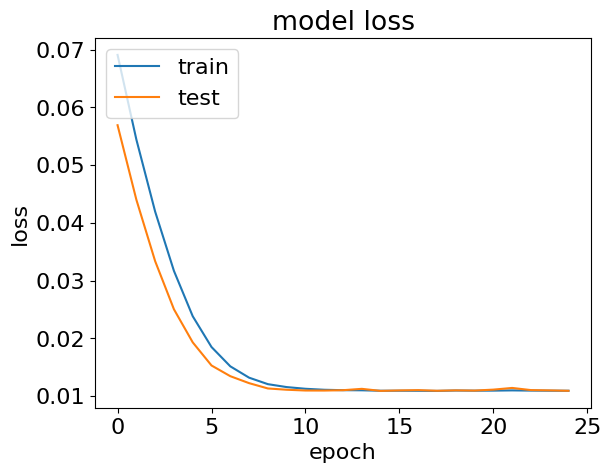

In [110]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [111]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
test_predict = sc_y.inverse_transform(test_predict.reshape(-1, 1))

print('Shape of train and test predict: ', train_predict.shape, test_predict.shape)

15/15 [==============================] - 0s 3ms/step
Shape of train and test predict:  (1385, 1) (462, 1)


In [112]:
# root mean squared error or rmse
import math
from sklearn.metrics import mean_squared_error

def measure_rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

train_score = measure_rmse(y_train, train_predict)
test_score = measure_rmse(y_test, test_predict)

print('Train and Test RMSE: ', train_score, test_score)

Train and Test RMSE:  0.10478875981282691 2.110757244185545


In [113]:
import math
from sklearn.metrics import r2_score, mean_squared_error

print("R2 score: ", r2_score(y_test, test_predict))
print("MSE", mean_squared_error(y_test, test_predict))
print("RMSE", math.sqrt(mean_squared_error(y_test, test_predict)))

R2 score:  0.8341120272639632
MSE 4.455296143881757
RMSE 2.110757244185545


 SMAPE prediction

In [114]:
print(smape(y_test, test_predict))

3632.6932784250366


 Direction Symmetry prediction

In [115]:
print(ds(y_test, test_predict))

84.3817787418655


 Theil's U coefficient prediction

In [116]:
print(u1(y_test, test_predict.flatten()))

0.014657700625143481


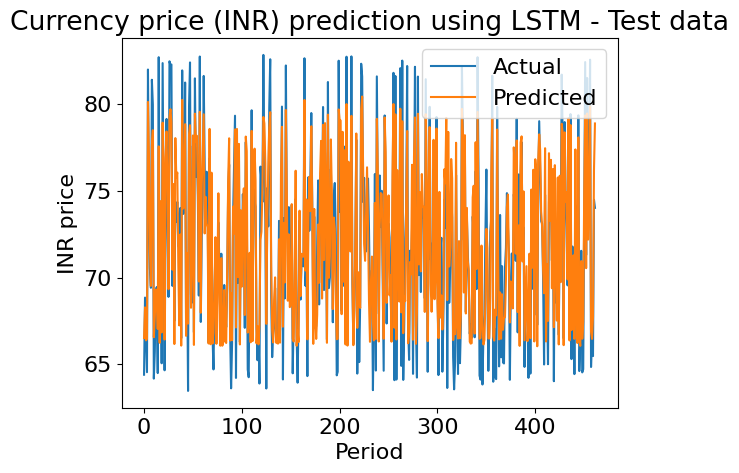

In [117]:
plt.rc("figure")
plt.rcParams.update({'font.size': 16})
plt.plot(y_test, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.xlabel('Period')
plt.ylabel('INR price')
plt.title('Currency price (INR) prediction using LSTM - Test data')
plt.legend()
plt.show()

# SARIMA

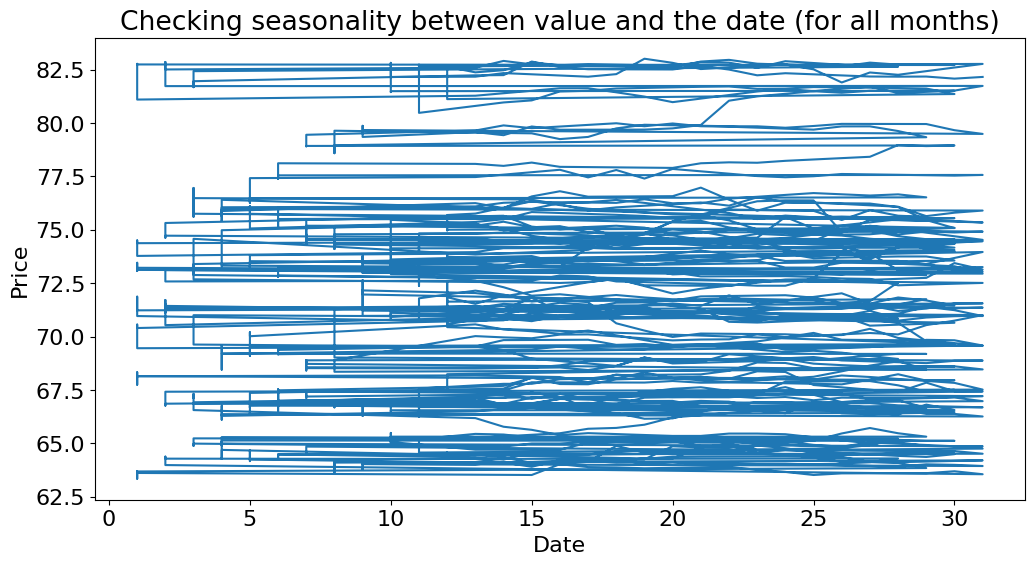

In [118]:
# Analysing for seasonality
from datetime import datetime
Date_column = df['Day']
Day_column = df['Day_of_week']

# Let's check for all the months for the exchange rate currency values in india
plt.figure(figsize=(12,6))
plt.plot(Date_column, df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Checking seasonality between value and the date (for all months)')
plt.show()

The graph is neither increasing or decreasing based on the months. So, let's check it for a particular week.

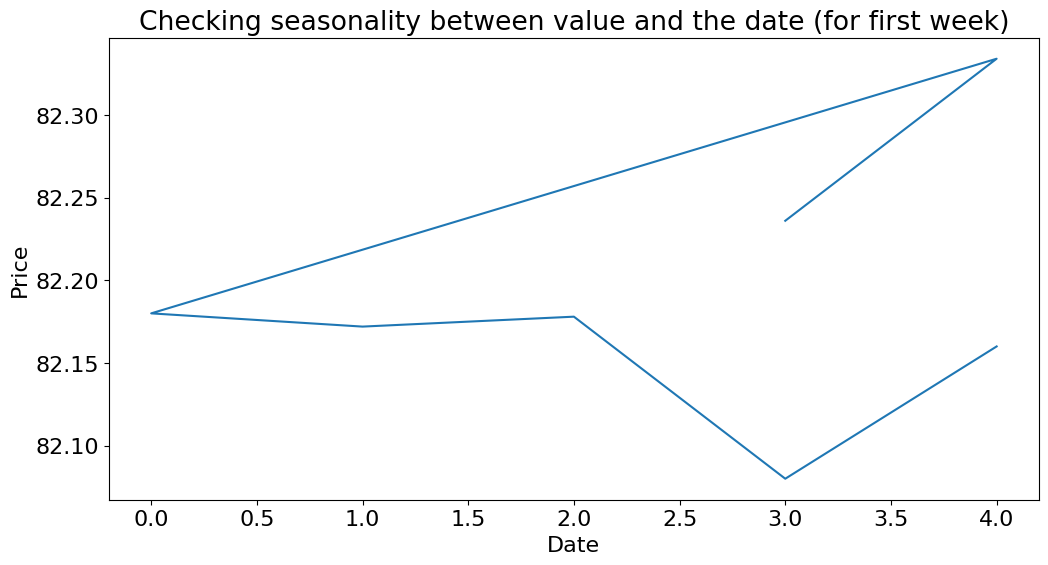

In [119]:
plt.figure(figsize=(12,6))
plt.plot(Day_column[:7], df['Price'][:7])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Checking seasonality between value and the date (for first week)')
plt.show()

In week we get to see that the friday has the highest currency rate and it decreases as we move to weekends. So, let's check for multiple weeks and figure out about the days at which we get the higher currency rate from all the week days.

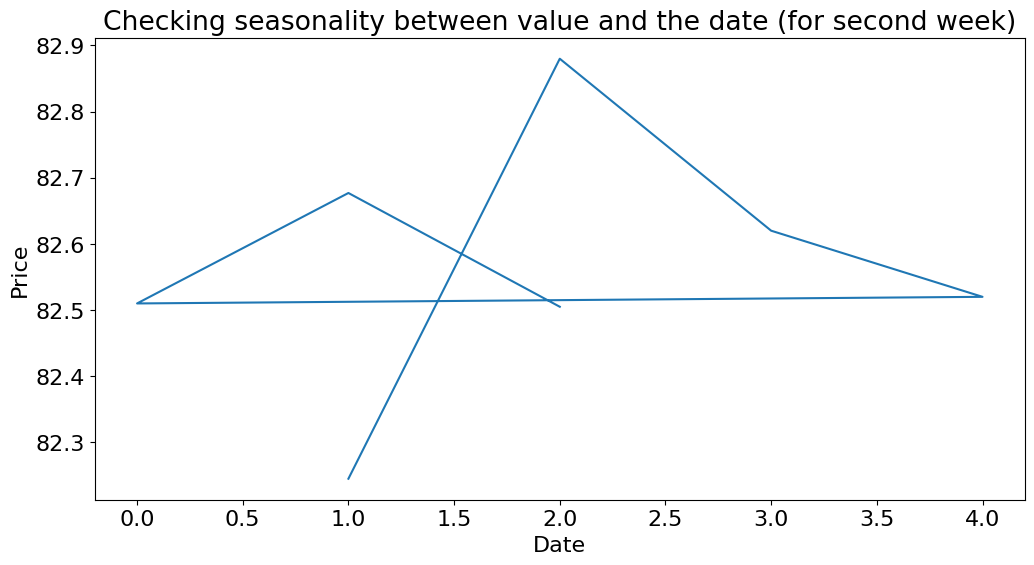

In [120]:
plt.figure(figsize=(12,6))
plt.plot(Day_column[7:14], df['Price'][7:14])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Checking seasonality between value and the date (for second week)')
plt.show()

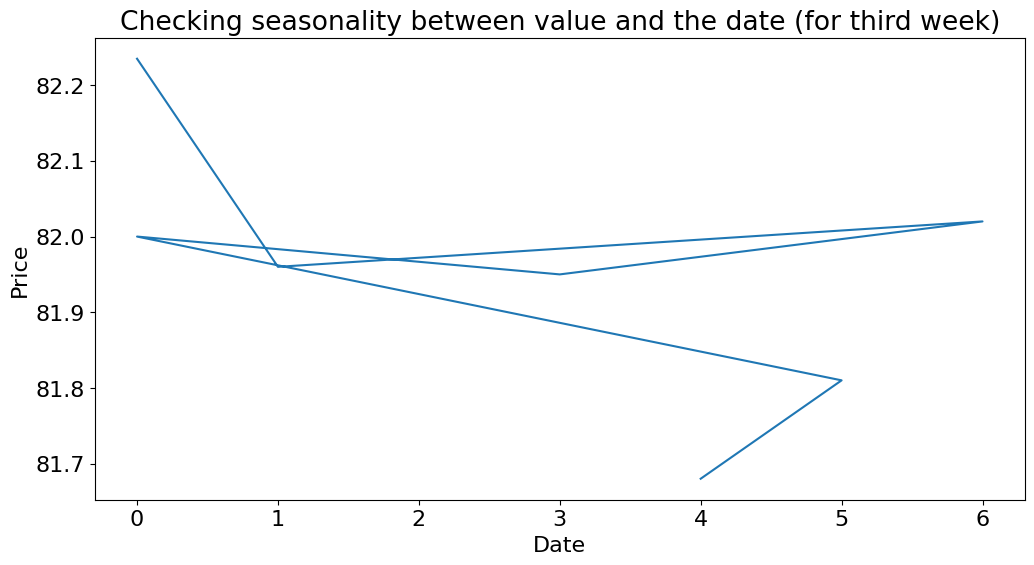

In [121]:
plt.figure(figsize=(12,6))
plt.plot(Day_column[14:21], df['Price'][14:21])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Checking seasonality between value and the date (for third week)')
plt.show()

(array([19417., 19448., 19478., 19509., 19539., 19570., 19601., 19631.]),
 [Text(19417.0, 0, '2023-03'),
  Text(19448.0, 0, '2023-04'),
  Text(19478.0, 0, '2023-05'),
  Text(19509.0, 0, '2023-06'),
  Text(19539.0, 0, '2023-07'),
  Text(19570.0, 0, '2023-08'),
  Text(19601.0, 0, '2023-09'),
  Text(19631.0, 0, '2023-10')])

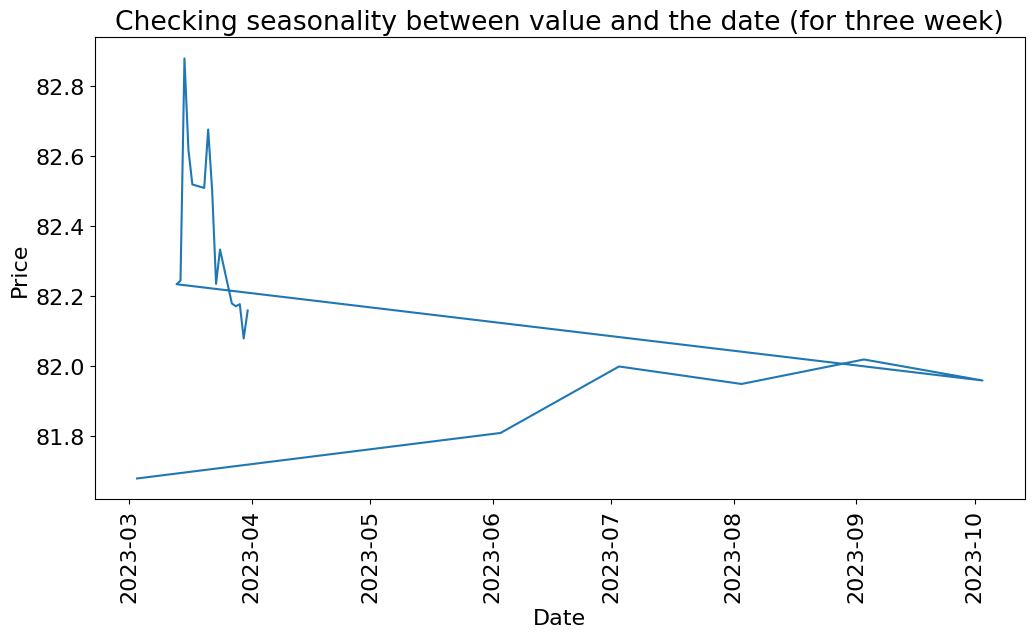

In [122]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'][:21], df['Price'][:21])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Checking seasonality between value and the date (for three week)')
plt.xticks(rotation=90)

As, we can see in the graph the rate of currency increases highly when we move from the december 31st, 2021 to January 1st 2022 and same when we have festivals like the currency rate rapidly increased when we have christmas on 25th or 26th december. 
Hence, SARIMA can help us to predict ouput currency rate based on the seasonality. 

In [123]:
df = df.set_index('Date')

In [124]:
df.dtypes

Price          float64
Open           float64
High           float64
Low            float64
Volume         float64
Chg            float64
Month            int64
Year             int64
Day              int64
Day_of_week      int64
dtype: object

In [125]:
INR_dataset = df.iloc[:, 0:1]
INR_dataset.head()

,Price
Date,
2023-03-31,82.160
2023-03-30,82.080
2023-03-29,82.178
2023-03-28,82.172
2023-03-27,82.180


We have to calculate p, d, q, P, D, and Q value for the SARIMA to make the model for our forecasting

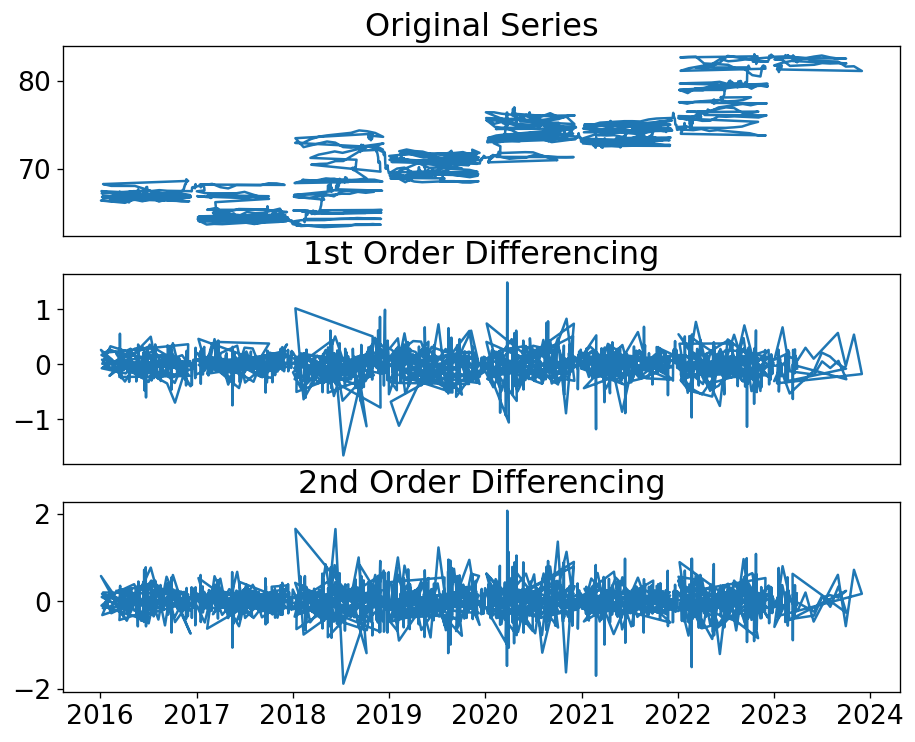

In [126]:
# Finding the d value
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(INR_dataset.Price); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(INR_dataset.Price.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(INR_dataset.Price.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

In the first order differencing we have few noises than the second order differencing. So, we select the first order differencing for the model

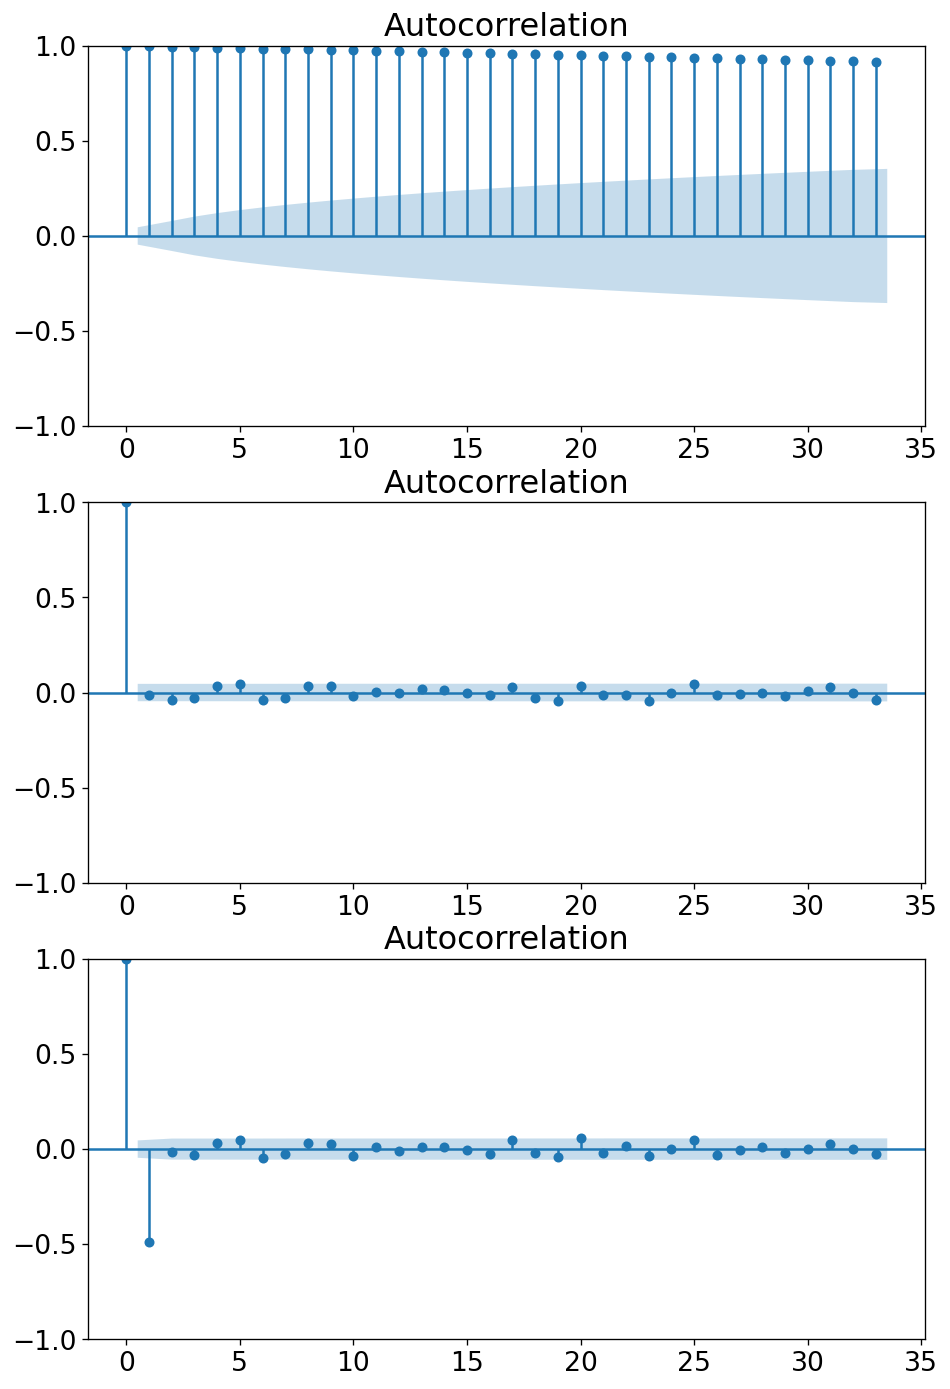

In [127]:
from statsmodels.graphics.tsaplots import plot_acf

plt.rcParams.update({'figure.figsize':(9,14), 'figure.dpi':120})
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(INR_dataset.Price, ax=ax1)
plot_acf(INR_dataset.Price.diff().dropna(), ax=ax2)
plot_acf(INR_dataset.Price.diff().diff().dropna(), ax=ax3)
plt.show()

Here we can see that the second order differencing the immediate lag is gone to the negative side, representing that in second order the series has become over the difference.
Hence d = 1.

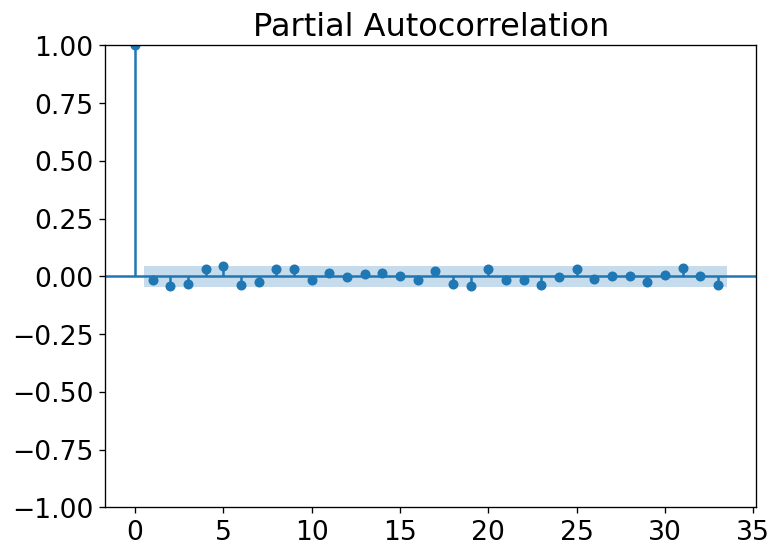

In [128]:
#Finding the p value
from statsmodels.graphics.tsaplots import plot_pacf

plt.rcParams.update({'figure.figsize':(7, 5), 'figure.dpi':120})
plot_pacf(INR_dataset.Price.diff().dropna(), method='ywm')
plt.show()

Here we can see that the first lag is most significant than any other lags in the graph.
Hence p = 1.

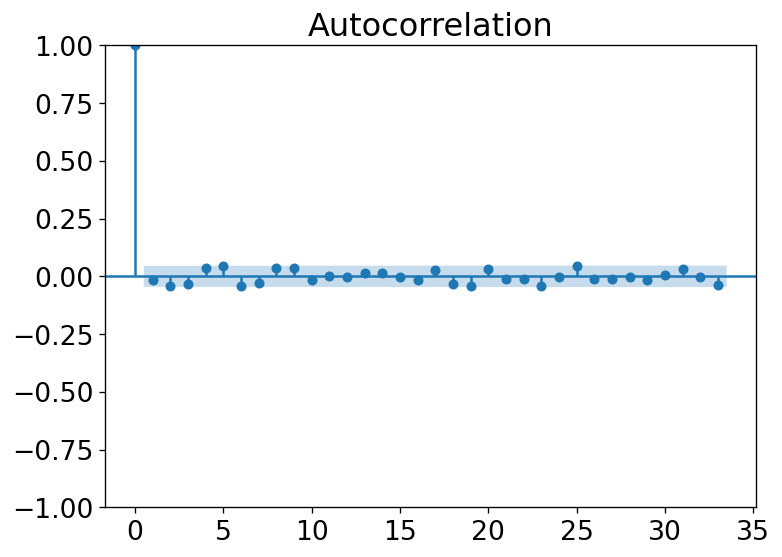

In [129]:
# Finding the q value

plot_acf(INR_dataset.Price.diff().dropna())
plt.show()

Here we can see that only 1 of the lag is out of significant limit.
Hence q = 1.

In [130]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(INR_dataset['Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit(dis=-1)
print(model.summary())

C:\Users\SANYAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SANYAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SANYAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  sel

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                 1847
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -39.073
Date:                            Mon, 17 Jul 2023   AIC                             88.146
Time:                                    23:04:49   BIC                            115.717
Sample:                                         0   HQIC                            98.314
                                           - 1847                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5221      0.456      1.146      0.252      -0.371       1.415
ma.L1         -0.5490      0.446   

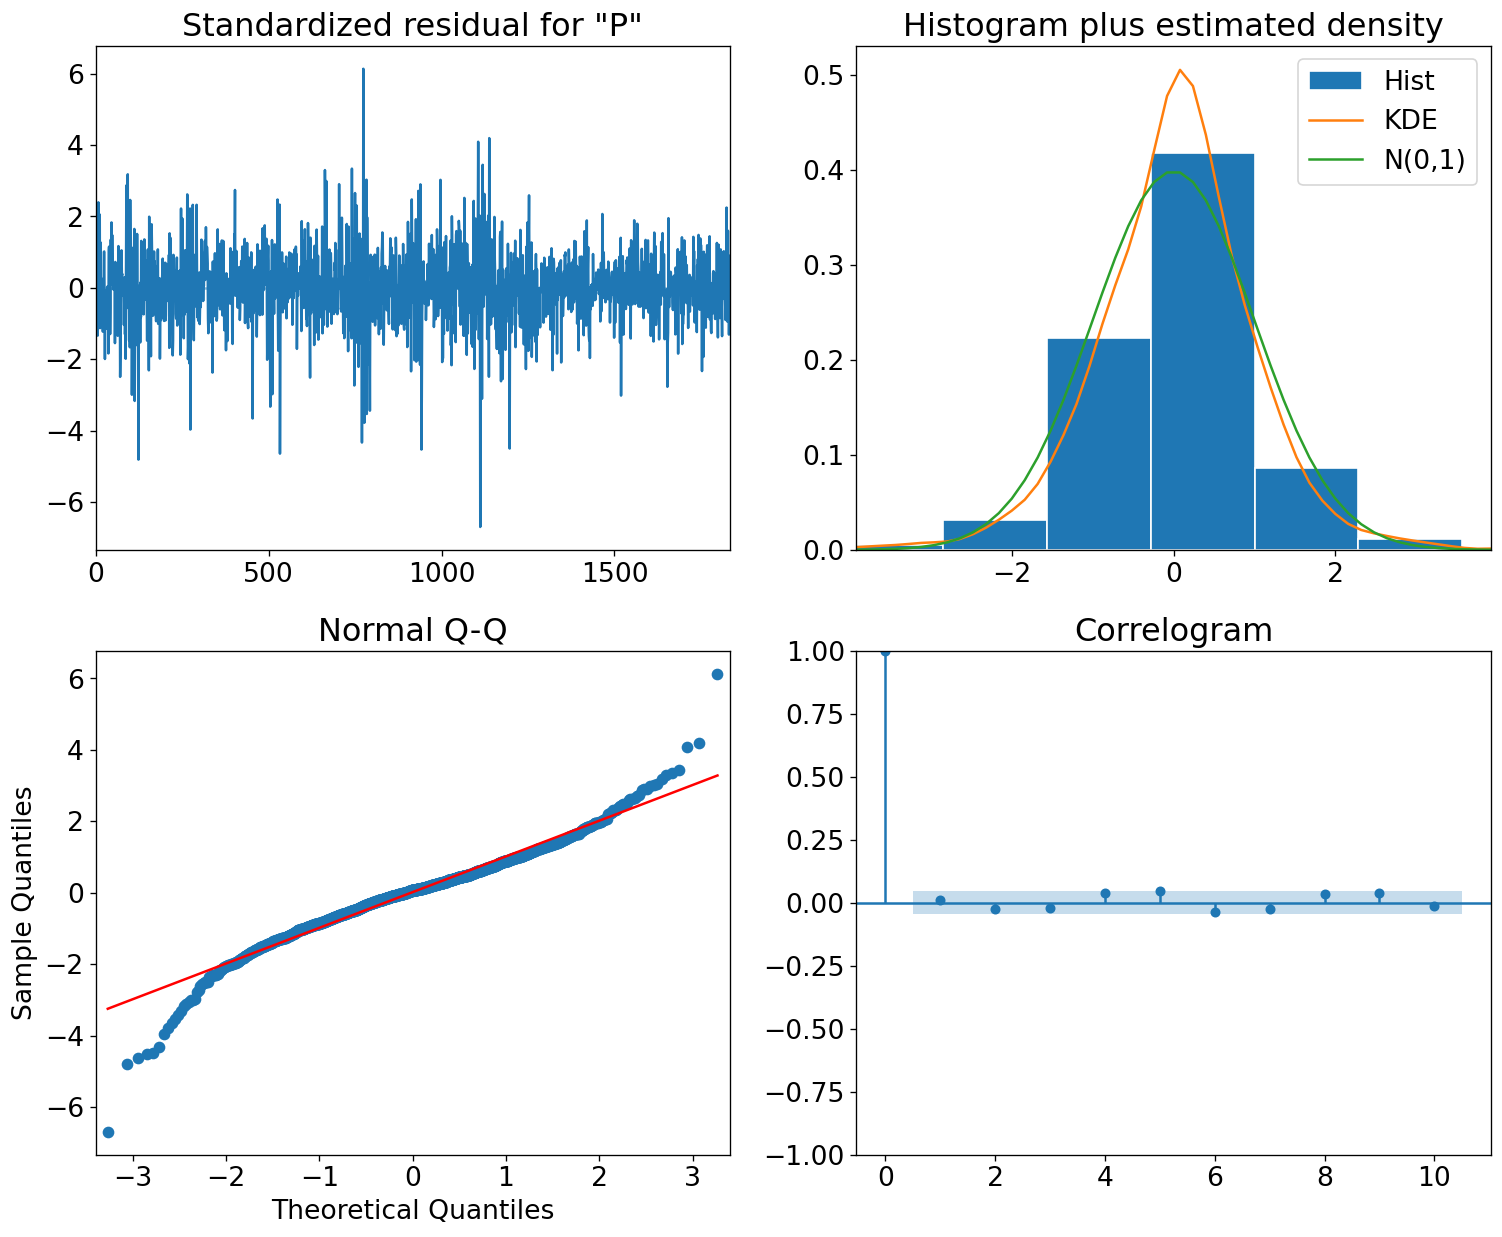

In [131]:
model.plot_diagnostics(figsize=(15,12))
plt.show()

In [132]:
INR_dataset = df.iloc[:, :]
INR_dataset.head()

,Price,Open,High,Low,Volume,Chg,Month,Year,Day,Day_of_week
Date,,,,,,,,,,
2023-03-31,82.160,82.088,82.282,82.044,0.0,0.10,3,2023,31,4
2023-03-30,82.080,82.238,82.286,82.030,0.0,-0.12,3,2023,30,3
2023-03-29,82.178,82.164,82.390,82.164,0.0,0.01,3,2023,29,2
2023-03-28,82.172,82.195,82.290,82.113,0.0,-0.01,3,2023,28,1
2023-03-27,82.180,82.374,82.441,82.200,0.0,-0.19,3,2023,27,0


In [133]:
INR_dataset = INR_dataset.reset_index()

C:\Users\SANYAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


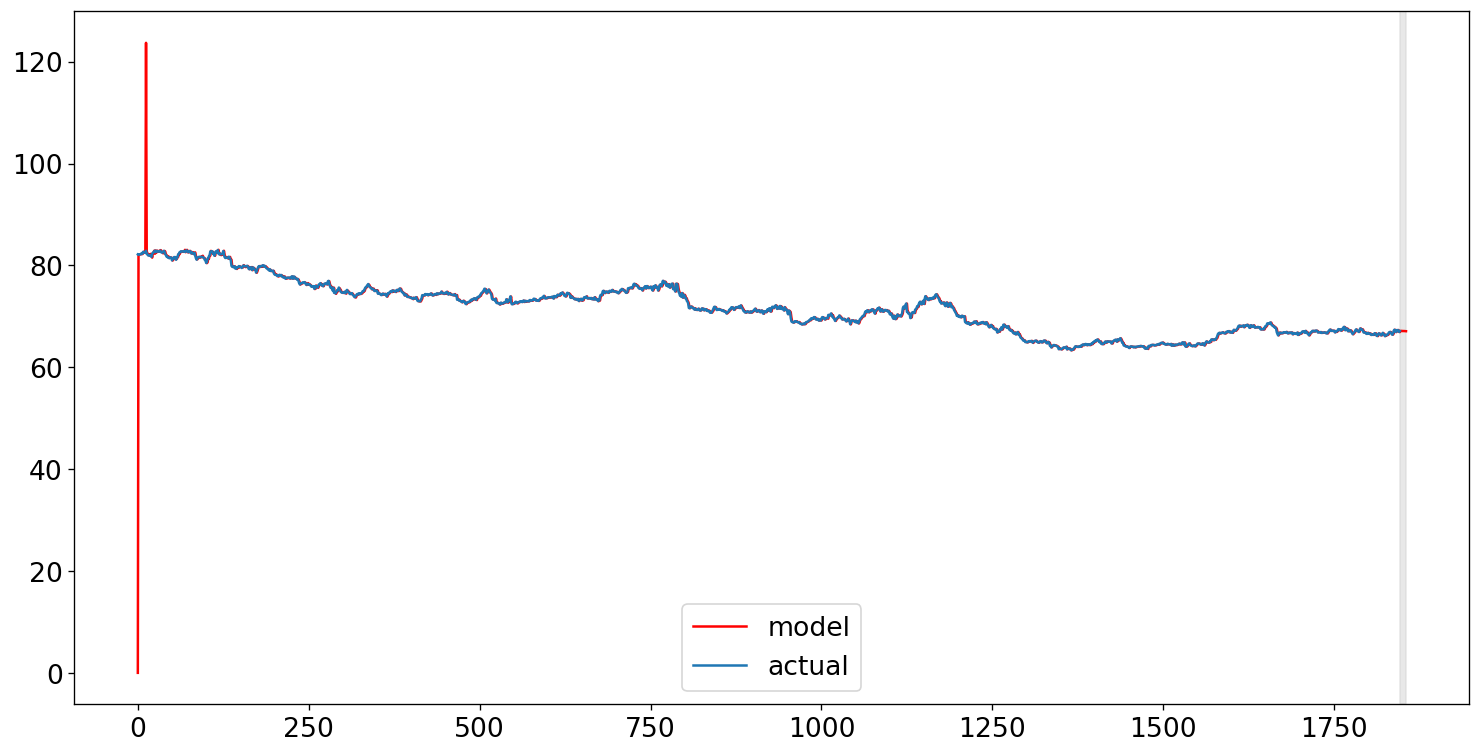

In [134]:
forecast = model.predict(start=0, end=INR_dataset.shape[0] + 8)

plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='model')
plt.axvspan(INR_dataset.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(INR_dataset['Price'], label='actual')
plt.legend()
plt.show()

In [135]:
#divide into train and validation set to calculate R-squared score and mean absolute percentage error 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

train = INR_dataset[:int(0.85*(len(INR_dataset)))]
test = INR_dataset[int(0.85*(len(INR_dataset))):]

start=len(train)
end=len(train)+len(test)-1
predictions = model.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions')
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Price'], predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(test['Price'], predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(test['Price'], predictions)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(test['Price'], predictions))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test['Price'])
                                                               /np.abs(test['Price']))*100 
evaluation_results

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
0,0.9126,0.147621,0.03691,0.192118,NaN


C:\Users\SANYAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


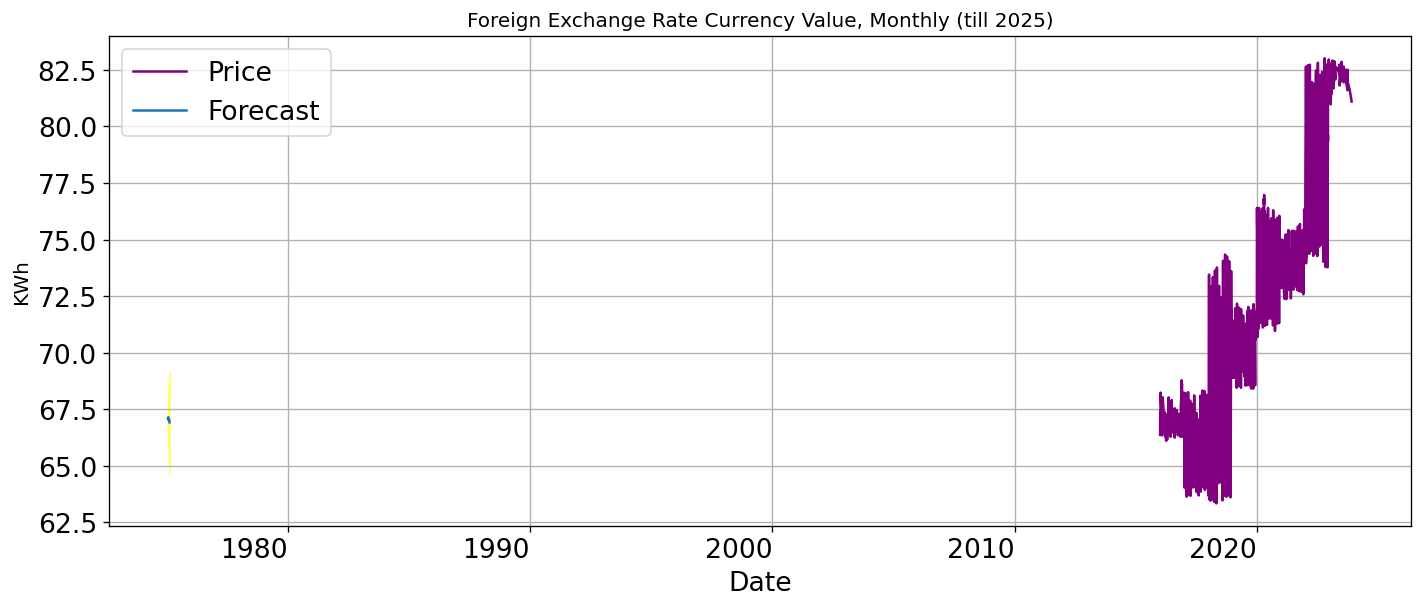

In [136]:
#Forecasting 2 years ahead
forecast_values = model.get_forecast(steps = 24)

#Confidence intervals of the forecasted values
forecast_ci = forecast_values.conf_int()

#Plot the data
ax = INR_dataset.plot(x='Date', y='Price', figsize = (14, 6), legend = True, color='purple')

#Plot the forecasted values 
forecast_values.predicted_mean.plot(ax=ax, label='Forecast', figsize = (14, 6), grid=True)

#Plot the confidence intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[: , 0],
                forecast_ci.iloc[: , 1], color='yellow', alpha = .5)
plt.title('Foreign Exchange Rate Currency Value, Monthly (till 2025)', size = 12)
plt.ylabel('KWh', size=12)
plt.legend(loc='upper left')
ax.axes.get_xaxis().set_visible(True)

plt.show()

In [138]:
test['Price']

1569    64.995
1570    65.425
1571    65.455
1572    65.455
1573    65.345
         ...  
1842    67.128
1843    67.313
1844    66.989
1845    66.938
1846    67.122
Name: Price, Length: 278, dtype: float64

In [144]:
predictions[0]

65.01658214992827

In [148]:
print(smape(np.array(list(test['Price'])), predictions))
print(ds(np.array(list(test['Price'])), predictions))
print(u1(np.array(list(test['Price'])), predictions))

0.22016985907791842
49.09747292418773
0.0014326023339460501
